# First AI net

Fahrenheit to Celsius

## Imports

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf  # type: ignore


In [72]:
from typing import List, Tuple
import numpy.typing as ntp

### Network

In [73]:
net = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])


### Creating dataset

In [74]:
def get_fahrenheit(fahrenheit: float) -> float:
    return fahrenheit * 1.8 + 32

In [75]:
def create_dataset(
    start: int, end: int, steps: int
) -> Tuple[ntp.NDArray[np.float_], ntp.NDArray[np.float_]]:
    celsius: List[float] = []
    fahrenheit: List[float] = []
    for i in range(start, end, (end - start) // steps):
        celsius.append(i)
        fahrenheit.append(get_fahrenheit(i))

    return (np.array(celsius, dtype=float), np.array(fahrenheit, dtype=float))


In [76]:
celsius, fahrenheit = create_dataset(-1000, 1000, 389)

In [77]:
print(
    type(celsius),
    celsius.shape,
    celsius.dtype,
    sep="\n"
)

<class 'numpy.ndarray'>
(400,)
float64


In [78]:
print(
    celsius,
    fahrenheit,
    sep="\n"
)

[-1000.  -995.  -990.  -985.  -980.  -975.  -970.  -965.  -960.  -955.
  -950.  -945.  -940.  -935.  -930.  -925.  -920.  -915.  -910.  -905.
  -900.  -895.  -890.  -885.  -880.  -875.  -870.  -865.  -860.  -855.
  -850.  -845.  -840.  -835.  -830.  -825.  -820.  -815.  -810.  -805.
  -800.  -795.  -790.  -785.  -780.  -775.  -770.  -765.  -760.  -755.
  -750.  -745.  -740.  -735.  -730.  -725.  -720.  -715.  -710.  -705.
  -700.  -695.  -690.  -685.  -680.  -675.  -670.  -665.  -660.  -655.
  -650.  -645.  -640.  -635.  -630.  -625.  -620.  -615.  -610.  -605.
  -600.  -595.  -590.  -585.  -580.  -575.  -570.  -565.  -560.  -555.
  -550.  -545.  -540.  -535.  -530.  -525.  -520.  -515.  -510.  -505.
  -500.  -495.  -490.  -485.  -480.  -475.  -470.  -465.  -460.  -455.
  -450.  -445.  -440.  -435.  -430.  -425.  -420.  -415.  -410.  -405.
  -400.  -395.  -390.  -385.  -380.  -375.  -370.  -365.  -360.  -355.
  -350.  -345.  -340.  -335.  -330.  -325.  -320.  -315.  -310.  -305.
  -300

## Train

In [79]:
net.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

In [80]:
hist = net.fit(celsius, fahrenheit, epochs=2500, verbose=0) # type: ignore

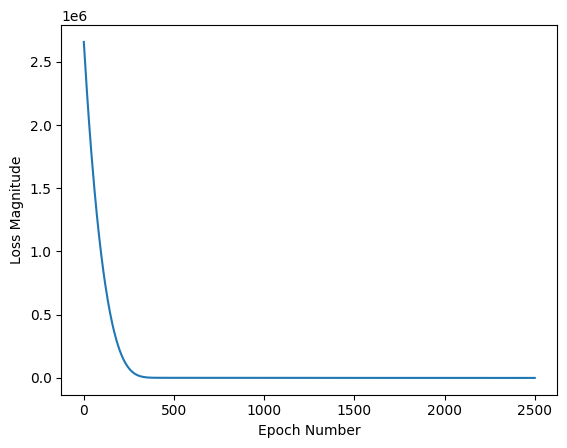

In [81]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss'])
plt.show()

## Prediction

In [129]:
to_try = 120
prediction = net.predict(tf.convert_to_tensor([to_try], dtype=float))
print(prediction[0][0], "vs", get_fahrenheit(to_try))


1/1 [==============================] - 0s 19ms/step
242.35185 vs 248.0


## Net vars

In [114]:
print(net.layers[0].get_weights())

[array([[1.8002425]], dtype=float32), array([26.32276], dtype=float32)]
